In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crypto_df = pd.read_csv("data/crypto_data.csv", index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [4]:
trading_df = crypto_df.loc[crypto_df["IsTrading"] == True]
#trading_df["IsTrading"].value_counts()

In [5]:
crypto_df = trading_df.drop("IsTrading", axis=1)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
crypto_df = crypto_df.dropna(axis=0, how="any")
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [7]:
crypto_df = crypto_df.loc[crypto_df["TotalCoinsMined"] > 0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [8]:
crypto_df = crypto_df.drop("CoinName", axis=1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [9]:
dummy = pd.get_dummies(data=crypto_df, columns = ["ProofType", "Algorithm"])
#dummy.shape
dummy.head()

,TotalCoinsMined,TotalCoinSupply,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,...,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(dummy)

In [52]:
#scaled.shape

(532, 98)

In [38]:
pca = PCA(n_components=0.90)

crypto_pca = pca.fit_transform(scaled)
crypto_pca.shape

(532, 74)

In [13]:
tsne = TSNE(learning_rate=42)

In [35]:
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

In [15]:
X = tsne_features[:,0]
y = tsne_features[:,1]

Text(0.5, 1.0, 'T-SNE Output')

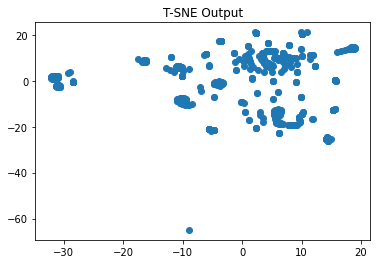

In [16]:
plt.scatter(X,y)
plt.title("T-SNE Output")

In [20]:
inertia = []
k = list(range(1, 12))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,46979.075160
1,2,45721.564884
2,3,44827.048432
3,4,44051.940126
4,5,43404.346120


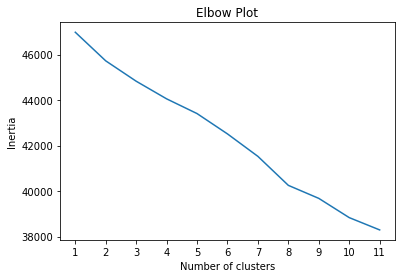

In [22]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,12))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

We could possibly interpret the elbow plot graph has having an elbow point at cluster 8, meaning we should stop dividing the data at 8 clusters. However, this isn't a clear elbow point as the inertia keeps decreasing, instead of tapering off. 

In [25]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster

In [29]:
for i in range(3,13):
    labels = cluster.KMeans(n_clusters=2, init="k-means++", random_state=0).fit(crypto_pca).labels_
    print ("Silhouette scores for K(clusters) = "+str(i)+ "is " +str(metrics.silhouette_score(crypto_pca, labels, metric="euclidean", sample_size=532, random_state=0)))

Silhouette scores for K(clusters) = 3is 0.7197284250791288
Silhouette scores for K(clusters) = 4is 0.7197284250791288
Silhouette scores for K(clusters) = 5is 0.7197284250791288
Silhouette scores for K(clusters) = 6is 0.7197284250791288
Silhouette scores for K(clusters) = 7is 0.7197284250791288
Silhouette scores for K(clusters) = 8is 0.7197284250791288
Silhouette scores for K(clusters) = 9is 0.7197284250791288
Silhouette scores for K(clusters) = 10is 0.7197284250791288
Silhouette scores for K(clusters) = 11is 0.7197284250791288
Silhouette scores for K(clusters) = 12is 0.7197284250791288


In [60]:
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans.fit(dummy[["TotalCoinsMined", "TotalCoinSupply"]])

KMeans(n_clusters=5)

In [57]:
dummy['clusters'] = kmeans.labels_

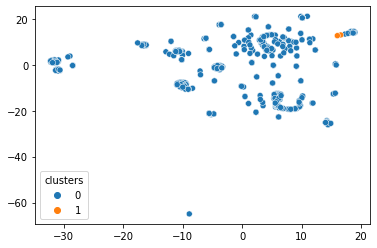

In [62]:
sns.scatterplot(x=X, y=y, hue='clusters', data=dummy)

This was my attempt at using the Silhouette method, however I wasn't entirely sure what I was doing, or what it means. Please enjoy.